In [1]:
from keras.models import load_model
from keras.preprocessing.image import image_dataset_from_directory
import numpy as np
from sklearn.metrics import confusion_matrix

In [6]:
! git clone https://github.com/Faris-ML/mask-detection.git

Cloning into 'mask-detection'...
remote: Enumerating objects: 11644, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 11644 (delta 0), reused 4 (delta 0), pack-reused 11638
Receiving objects: 100% (11644/11644), 400.24 MiB | 34.01 MiB/s, done.
Checking out files: 100% (11800/11800), done.


In [2]:
model=load_model('/content/mask-detection/masknet.h5')
test_dir = '/content//mask-detection/Face Mask Dataset/Test'

test= image_dataset_from_directory(directory=test_dir,label_mode='categorical',batch_size=992,image_size=(128,128))

Found 992 files belonging to 2 classes.


In [3]:
y_pred=np.array([])
y_true=np.array([])

for x,y in test.take(1):
    y_pred=np.concatenate([y_pred,np.argmax(model.predict(x),axis=-1)])
    y_true=np.concatenate([y_true,np.argmax(y.numpy(),axis=-1)])

In [4]:
cm=confusion_matrix(y_true=y_true,y_pred=y_pred)
tn, fp, fn, tp=cm.ravel()
print('confusion matrix is :')
print(cm)
print('performance measures : ')
accuracy=(tp+tn)/(tp+tn+fp+fn)
Miscallification_rate= 1-accuracy
TP_rate = tp/(tp+fn)
FP_rate = fp/(tn+fp)
TN_rate = tn/(tn+fp)
precision = tp/(tp+fp)
prevalence = (tp+fp)/(tp+fp+tn+fn)
balanced_accuracy = (TN_rate+TP_rate)/2
F1_score = (2*tp)/(2*tp+fn+tn)
print("\naccuracy: %18.3f" % (accuracy))
print("Miscallification rate: %1.3f" % (Miscallification_rate))
print("True positive rate: %8.3f" % (TP_rate))
print("false positive rate: %7.3f" % (FP_rate))
print("true negative rate: %8.3f" % (TN_rate))
print("precision: %17.3f" % (precision))
print("prevalence: %16.3f" % (prevalence))
print("balanced accuracy: %9.3f" % (balanced_accuracy))
print("F1 score: %18.3f" % (F1_score))


confusion matrix is :
[[474   9]
 [  3 506]]
performance measures : 

accuracy:              0.988
Miscallification rate: 0.012
True positive rate:    0.994
false positive rate:   0.019
true negative rate:    0.981
precision:             0.983
prevalence:            0.519
balanced accuracy:     0.988
F1 score:              0.680


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade --user matplotlib

In [6]:
def heatmap(confusion_matrix,lbl):
  actual = lbl
  predicted =lbl

  confusion_matrix = confusion_matrix


  fig, ax = plt.subplots()
  im = ax.imshow(confusion_matrix)

# Show all ticks and label them with the respective list entries
  ax.set_xticks(ticks=np.arange(len(actual)), labels=actual)
  ax.set_yticks(ticks=np.arange(len(predicted)), labels=predicted)

# Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
  for i in range(len(predicted)):
      for j in range(len(actual)):
          text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")

  ax.set_title("confusion matrix heatmap")
  fig.tight_layout()
  plt.show()

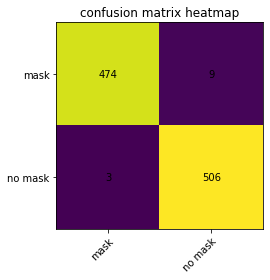

In [7]:
heatmap(confusion_matrix=cm,lbl=["mask","no mask"])